In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_train,x_valid=x_train[:50000],x_train[50000:]
y_train,y_valid=y_train[:50000],y_train[50000:]

In [4]:
scaler=StandardScaler()

In [5]:
x_train=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [6]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for _ in range(30):
    model.add(tf.keras.layers.Dense(100))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

              
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,validation_data=[x_valid,y_valid],epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 423us/sample - loss: 1.3472 - accuracy: 0.4980 - val_loss: 0.9469 - val_accuracy: 0.6495
Epoch 2/50
50000/50000 [==============================] - 15s 290us/sample - loss: 0.9809 - accuracy: 0.6358 - val_loss: 0.8922 - val_accuracy: 0.6644
Epoch 3/50
50000/50000 [==============================] - 15s 292us/sample - loss: 0.8776 - accuracy: 0.6706 - val_loss: 0.6935 - val_accuracy: 0.7282
Epoch 4/50
50000/50000 [==============================] - 15s 294us/sample - loss: 0.8142 - accuracy: 0.6894 - val_loss: 0.6644 - val_accuracy: 0.7318
Epoch 5/50
50000/50000 [==============================] - 16s 318us/sample - loss: 0.7669 - accuracy: 0.7103 - val_loss: 0.6792 - val_accuracy: 0.7473
Epoch 6/50
50000/50000 [==============================] - 15s 303us/sample - loss: 0.7310 - accuracy: 0.7298 - val_loss: 0.6898 - val_accuracy: 0.7611
Epoch 7/50
50000/50000 [====================

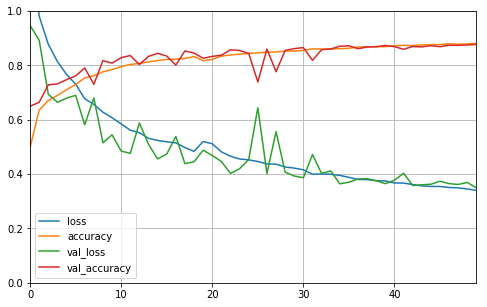

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [13]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36861253863573074, 0.8724]

In [15]:
# 1.    20层，不使用批归一化，不使用dropout，训练集0.9375 验证集0.8678 测试集0.8595 有过拟合现象 epochs=30
# 2.    30层，不使用批归一化，不使用dropout，训练集0.8934 验证集0.8559 测试集0.8477  有过拟合现象 epochs=30
# 3.    30层，不使用批归一化，不使用dropout，训练集0.9287 验证集0.8857 测试集0.8751 有过拟合现象 epochs=50
#       说明对于这个模型30轮训练是不充分的，说明使用earlystopping是必要的
# 4.    30层，用批归一化（放在激活函数之后），不使用dropout，训练集0.8397 验证集0.8264 测试集0.8211  没有明显过拟合现象 epochs=50
# 5.    30层，用批归一化（放在激活函数之前），不使用dropout，训练集0.8808 验证集0.8772 测试集0.8724  没有明显过拟合现象 epochs=50